In [1]:
mydata = read.csv('../input/Tweets.csv',header = T, na.strings=c("","NA"))

In [2]:
str(mydata)

'data.frame':	14640 obs. of  15 variables:
 $ tweet_id                    : num  5.7e+17 5.7e+17 5.7e+17 5.7e+17 5.7e+17 ...
 $ airline_sentiment           : Factor w/ 3 levels "negative","neutral",..: 2 3 2 1 1 1 3 2 3 3 ...
 $ airline_sentiment_confidence: num  1 0.349 0.684 1 1 ...
 $ negativereason              : Factor w/ 10 levels "Bad Flight","Can't Tell",..: NA NA NA 1 2 2 NA NA NA NA ...
 $ negativereason_confidence   : num  NA 0 NA 0.703 1 ...
 $ airline                     : Factor w/ 6 levels "American","Delta",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ airline_sentiment_gold      : Factor w/ 3 levels "negative","neutral",..: NA NA NA NA NA NA NA NA NA NA ...
 $ name                        : Factor w/ 7701 levels "___the___","__betrayal",..: 1073 3477 7666 3477 3477 3477 1392 5658 1874 7665 ...
 $ negativereason_gold         : Factor w/ 13 levels "Bad Flight","Can't Tell",..: NA NA NA NA NA NA NA NA NA NA ...
 $ retweet_count               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ text        

In [3]:
library(ggplot2)
library(dplyr)
library(ggthemes)
library(grid)
library(tidyr)
library(tidytext)
library(wordcloud)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: RColorBrewer


In [4]:
#let's check NA values for each predictors.

for(i in 1:15){
  print(sum(is.na(mydata[,i])))
}


[1] 0
[1] 0
[1] 0
[1] 5462
[1] 4118
[1] 0
[1] 14600
[1] 0
[1] 14608
[1] 0
[1] 0
[1] 13621
[1] 0
[1] 4733
[1] 4820


In [5]:
#Extracting the predictors below since they aren't containing any kind of important information.
mydata = mydata[,-c(1,7,8,9,12,14)]
str(mydata)

'data.frame':	14640 obs. of  9 variables:
 $ airline_sentiment           : Factor w/ 3 levels "negative","neutral",..: 2 3 2 1 1 1 3 2 3 3 ...
 $ airline_sentiment_confidence: num  1 0.349 0.684 1 1 ...
 $ negativereason              : Factor w/ 10 levels "Bad Flight","Can't Tell",..: NA NA NA 1 2 2 NA NA NA NA ...
 $ negativereason_confidence   : num  NA 0 NA 0.703 1 ...
 $ airline                     : Factor w/ 6 levels "American","Delta",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ retweet_count               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ text                        : Factor w/ 14427 levels ",@USAirways 2nd time this occurred in 3 weeks. I'm not patient. I have no choice.  #Antitrust issue",..: 14120 14027 13898 13961 13763 14041 14153 14032 14119 13959 ...
 $ tweet_created               : Factor w/ 14247 levels "2015-02-16 23:36:05 -0800",..: 14212 14170 14169 14168 14166 14165 14164 14160 14158 14106 ...
 $ user_timezone               : Factor w/ 85 levels "Abu Dhabi","Adelaide",..: 31 63 

In [6]:
mydata$tweet_created = as.character(mydata$tweet_created)
mydata$text = as.character(mydata$text)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

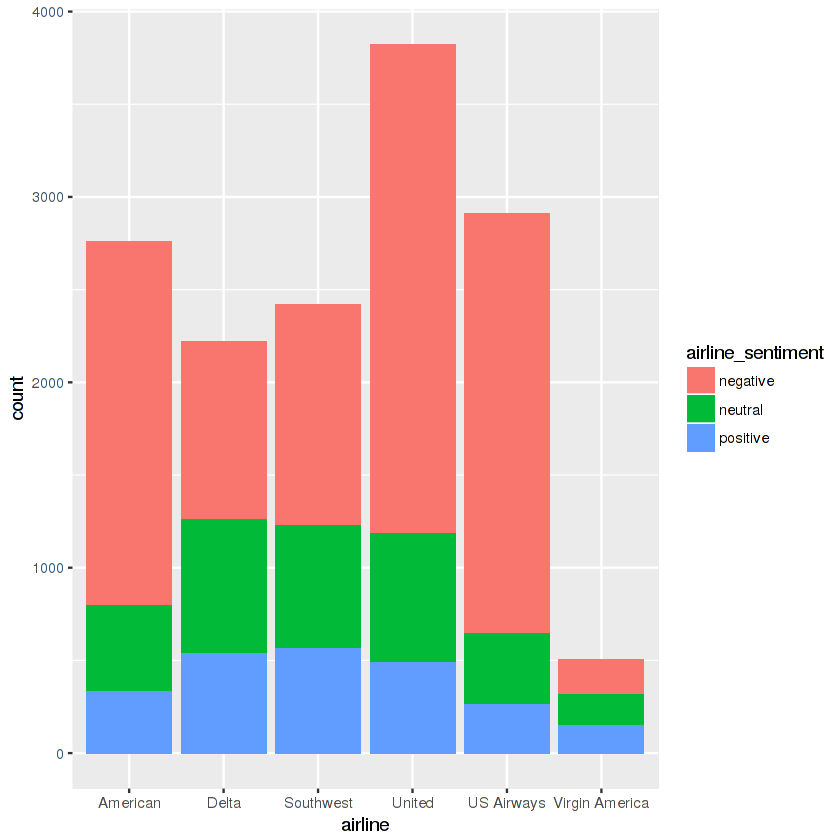

In [7]:
##Airline vs airline_sentiment
k <- ggplot(mydata, aes(airline,fill = airline_sentiment))
k <- k + geom_histogram(stat="count")
print(k)

In [8]:
xtabs(~mydata$airline + mydata$airline_sentiment ,data=mydata )
prop.table(table(mydata$airline,mydata$airline_sentiment),1)

                mydata$airline_sentiment
mydata$airline   negative neutral positive
  American           1960     463      336
  Delta               955     723      544
  Southwest          1186     664      570
  United             2633     697      492
  US Airways         2263     381      269
  Virgin America      181     171      152

                
                   negative    neutral   positive
  American       0.71040232 0.16781443 0.12178325
  Delta          0.42979298 0.32538254 0.24482448
  Southwest      0.49008264 0.27438017 0.23553719
  United         0.68890633 0.18236525 0.12872841
  US Airways     0.77686234 0.13079300 0.09234466
  Virgin America 0.35912698 0.33928571 0.30158730

In [9]:
# we can infer that American and US Airways are evaluated as worse than their competitors by percentage
# Virgin America and Delta are better than their competitors in terms of percentage

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

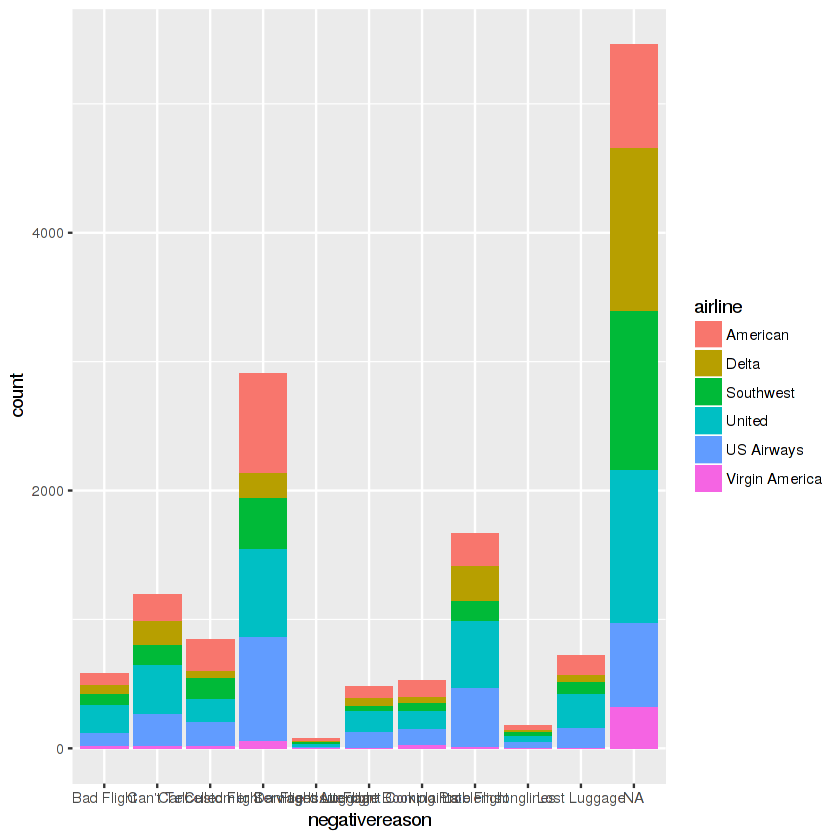

In [10]:
##negativereaseon vs airline_sentiment
k <- ggplot(mydata, aes(negativereason,fill = airline))
k <- k + geom_histogram(stat="count")
print(k)

In [11]:
xtabs(~mydata$negativereason + mydata$airline ,data=mydata )
prop.table(table(mydata$negativereason,mydata$airline),2)


                             mydata$airline
mydata$negativereason         American Delta Southwest United US Airways
  Bad Flight                        87    64        90    216        104
  Can't Tell                       198   186       159    379        246
  Cancelled Flight                 246    51       162    181        189
  Customer Service Issue           768   199       391    681        811
  Damaged Luggage                   12    11        14     22         11
  Flight Attendant Complaints       87    60        38    168        123
  Flight Booking Problems          130    44        61    144        122
  Late Flight                      249   269       152    525        453
  longlines                         34    14        29     48         50
  Lost Luggage                     149    57        90    269        154
                             mydata$airline
mydata$negativereason         Virgin America
  Bad Flight                              19
  Can't Tell       

                             
                                 American       Delta   Southwest      United
  Bad Flight                  0.044387755 0.067015707 0.075885329 0.082035701
  Can't Tell                  0.101020408 0.194764398 0.134064081 0.143942271
  Cancelled Flight            0.125510204 0.053403141 0.136593592 0.068742879
  Customer Service Issue      0.391836735 0.208376963 0.329679595 0.258640334
  Damaged Luggage             0.006122449 0.011518325 0.011804384 0.008355488
  Flight Attendant Complaints 0.044387755 0.062827225 0.032040472 0.063805545
  Flight Booking Problems     0.066326531 0.046073298 0.051433390 0.054690467
  Late Flight                 0.127040816 0.281675393 0.128161889 0.199392328
  longlines                   0.017346939 0.014659686 0.024451939 0.018230156
  Lost Luggage                0.076020408 0.059685864 0.075885329 0.102164831
                             
                               US Airways Virgin America
  Bad Flight             

In [12]:
# American suffers from Customer Service Issue
# Delta suffers from Late Flight, Can't tell and Customer Service Issue
# Southwest suffers from Customer Service Issue
# United suffers from Customer Service Issue and Late Flight
# US Airways suffer Customer Service Issue and Late Flight
# Virgin America suffer from Customer Service Issue and Flight Booking Problems

[1] 0.08265027

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

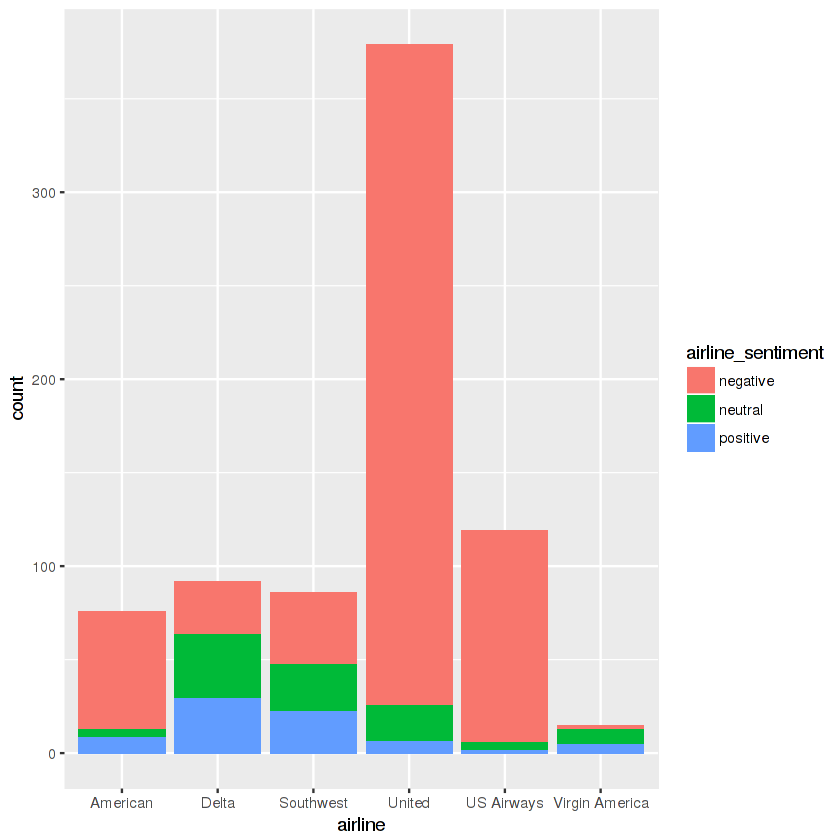

In [13]:
##retweet_count vs airline
mean(mydata$retweet_count)

mydata_retweeted <- mydata %>% filter(
  retweet_count != 0
)
k <- ggplot(mydata_retweeted, aes(airline,fill = airline_sentiment))
k <- k + geom_histogram(stat="count")
print(k)

In [14]:
xtabs(~mydata_retweeted$airline + mydata_retweeted$airline_sentiment ,data=mydata_retweeted )
prop.table(table(mydata_retweeted$airline,mydata_retweeted$airline_sentiment),1)

                        mydata_retweeted$airline_sentiment
mydata_retweeted$airline negative neutral positive
          American             63       4        9
          Delta                28      34       30
          Southwest            38      25       23
          United              353      19        7
          US Airways          113       4        2
          Virgin America        2       8        5

                
                   negative    neutral   positive
  American       0.82894737 0.05263158 0.11842105
  Delta          0.30434783 0.36956522 0.32608696
  Southwest      0.44186047 0.29069767 0.26744186
  United         0.93139842 0.05013193 0.01846966
  US Airways     0.94957983 0.03361345 0.01680672
  Virgin America 0.13333333 0.53333333 0.33333333

In [15]:
# if United,American or US Airways passenger's tweet is retweeted, the tweet is most likely negative.

In [16]:
##airline_sentiment_confidence vs airline_sentiment
sum(is.na(mydata$airline_sentiment_confidence))

mean(mydata$airline_sentiment_confidence)

by_airlinesentimentconfidence_airline <- group_by(mydata,airline)
categorized_airlinesentiment_airline <- summarize (by_airlinesentimentconfidence_airline,n=n(),
                                                   mn=mean(airline_sentiment_confidence))
categorized_airlinesentiment_airline

[1] 0

[1] 0.9001689

airline,n,mn
American,2759,0.9173519
Delta,2222,0.8698783
Southwest,2420,0.8865160
United,3822,0.9008777
US Airways,2913,0.9215784
Virgin America,504,0.8760861


In [17]:
#airline_sentiment_confidence predictor doesn't make any sense.

In [18]:
##Negativereason_confidence vs airline_sentiment
sum(is.na(mydata$negativereason_confidence))
mean(mydata$negativereason_confidence, na.rm=TRUE)

by_negativereason_airline <- group_by(mydata,airline)
categorized_negativereason_airline <- summarize (by_negativereason_airline,n=n(),
                                                 mn=mean(negativereason_confidence,na.rm = TRUE))
categorized_negativereason_airline

[1] 4118

[1] 0.6382983

airline,n,mn
American,2759,0.6664389
Delta,2222,0.5730965
Southwest,2420,0.6015080
United,3822,0.6272854
US Airways,2913,0.6871717
Virgin America,504,0.5569854


In [19]:
# this predictor(Negativereason_confidence) isn't giving so much information 

In [20]:
text_df <- data_frame(line = 1:nrow(mydata), airline=mydata$airline, text = mydata$text )

grouped_text <- unnest_tokens(text_df,word, text)

Joining, by = "word"


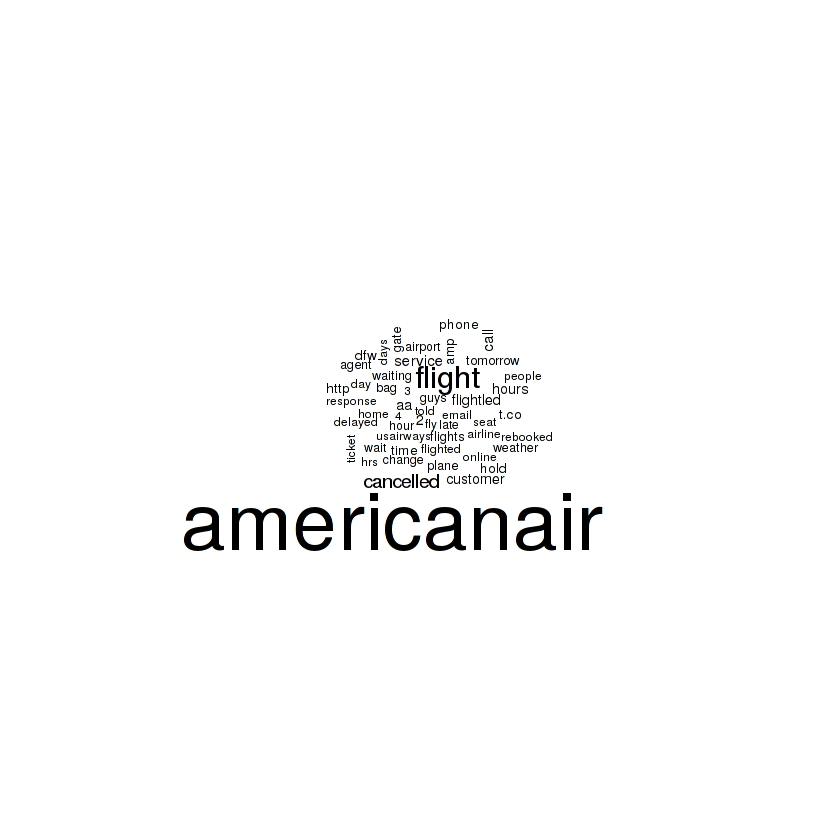

In [21]:
##American wordcloud
grouped_text %>% filter(airline == 'American')%>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 50))

Joining, by = "word"


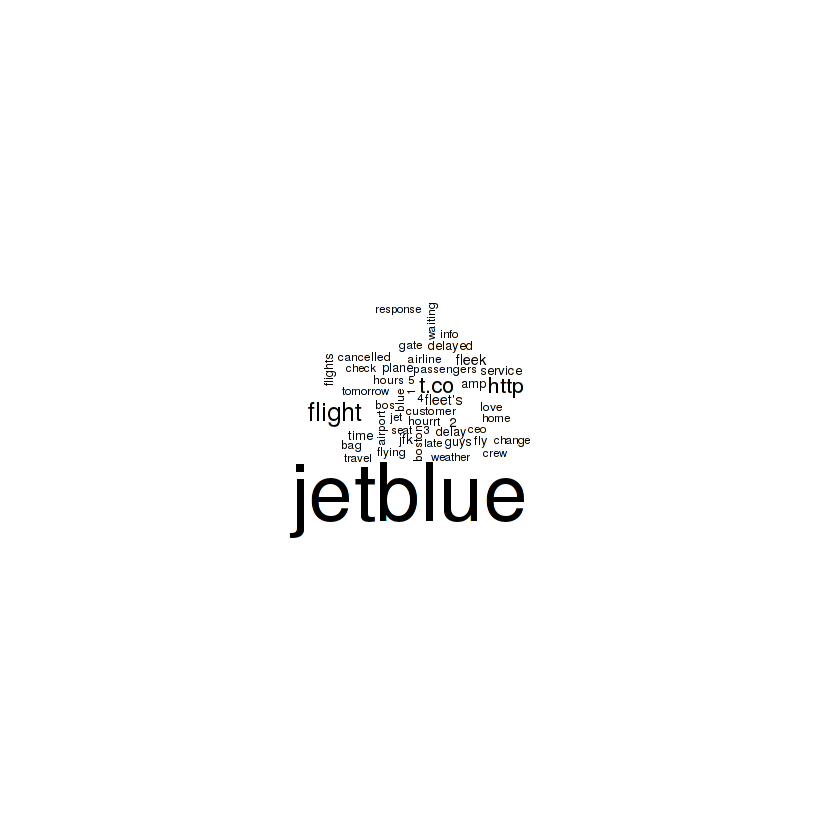

In [22]:
##Delta Wordcloud
grouped_text %>% filter(airline == 'Delta')%>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 50))

Joining, by = "word"


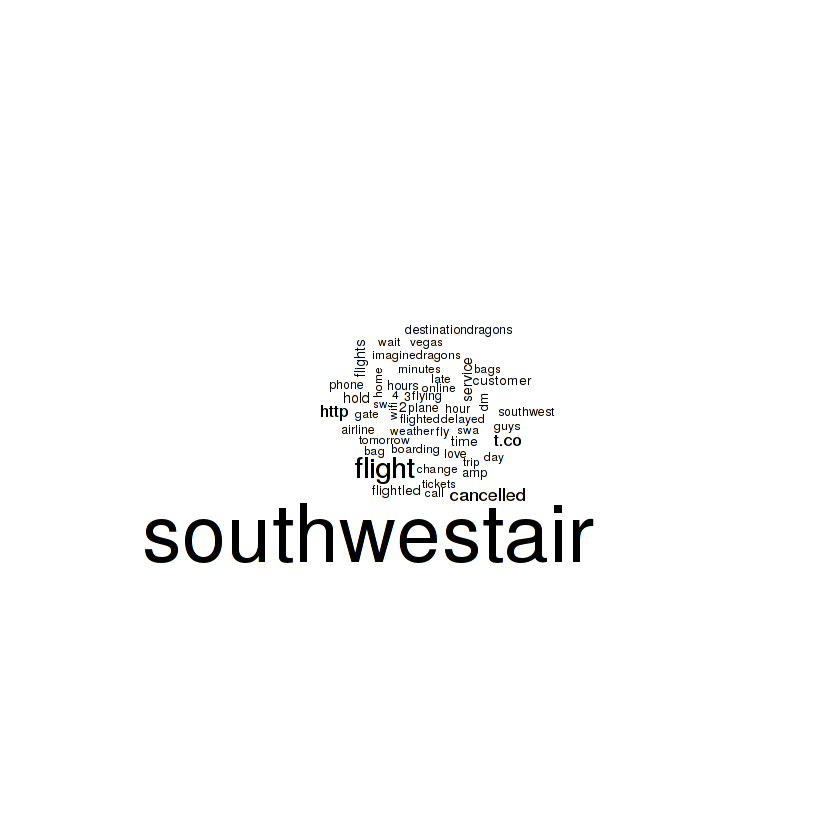

In [23]:
##Southwest WordCloud
grouped_text %>% filter(airline == 'Southwest')%>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 50))

Joining, by = "word"


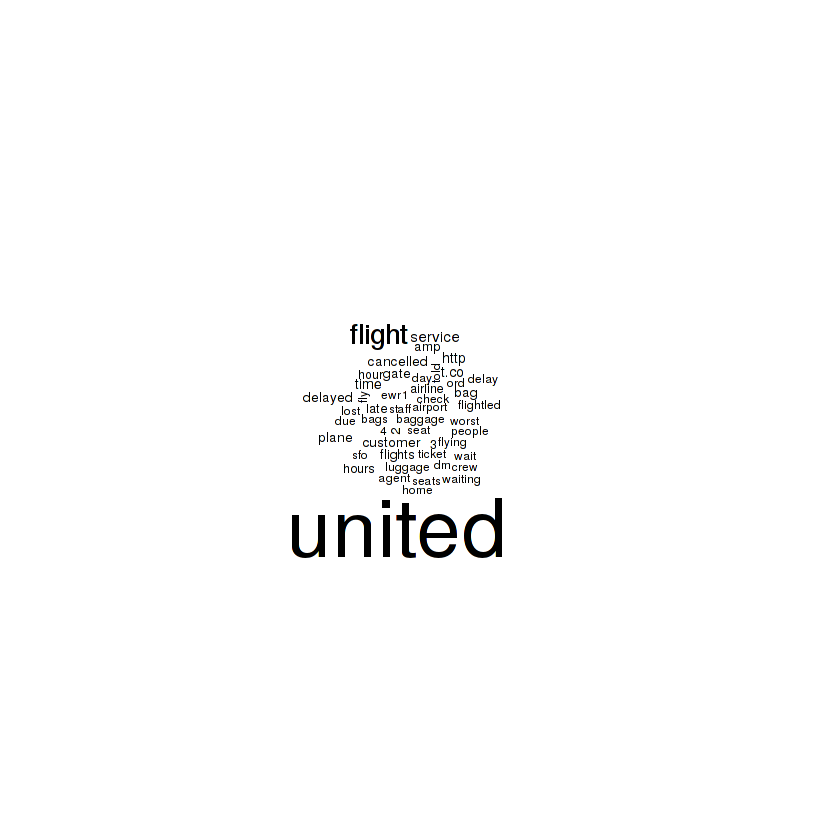

In [24]:
##United WordCloud
grouped_text %>% filter(airline == 'United')%>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 50))

Joining, by = "word"


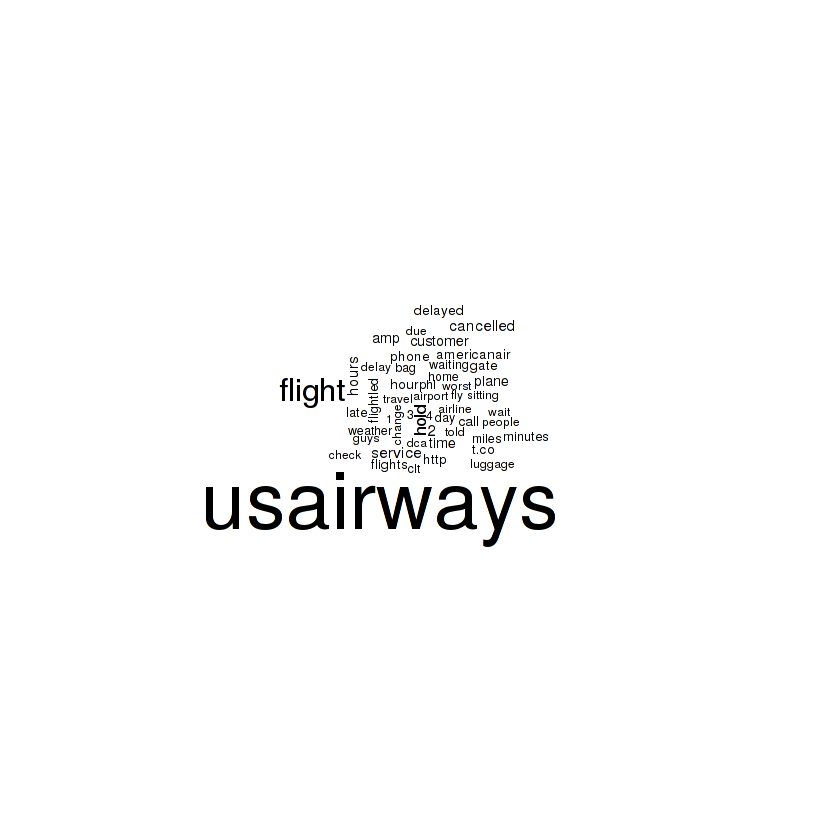

In [25]:
##US Airways WordCloud
grouped_text %>% filter(airline == 'US Airways')%>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 50))

Joining, by = "word"


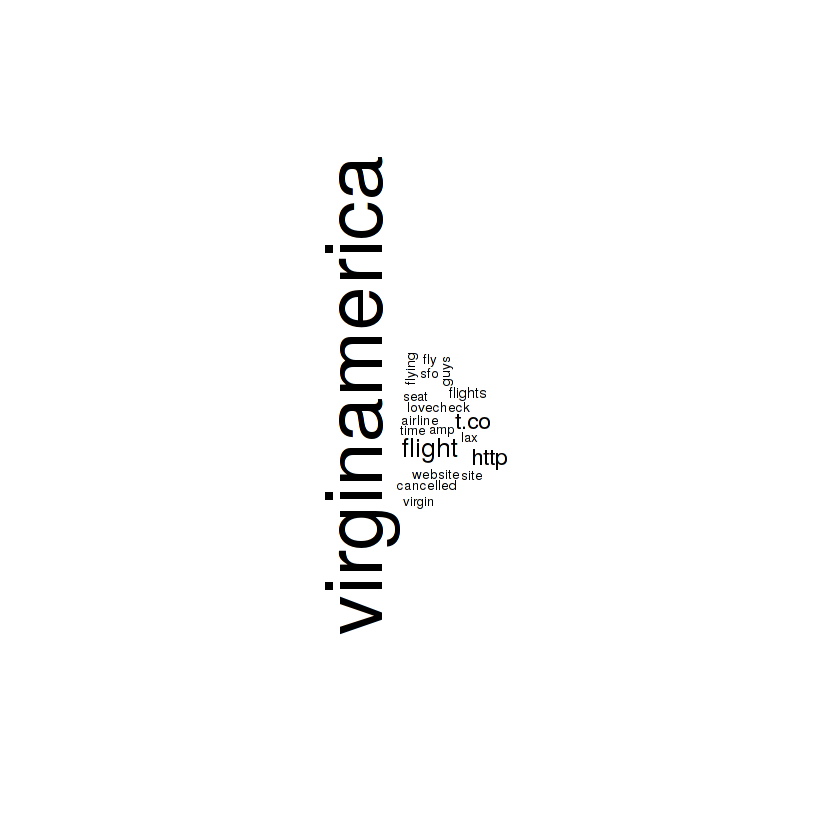

In [26]:
##Virgin America Word Cloud
grouped_text %>% filter(airline == 'Virgin America')%>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 20))